In [2]:
#Create a machine learning model to predict the where the target variable should be an NBA team's strategy for the upcoming NBA season (such as tanking, contending, etc) based on the team's current roster and other factors.

#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#Importing the datasets
tmr_22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\team_ratings\tmr_2022_23.csv")
tmr_22.head(5)

,Rk,Team,Conf,Div,W,L,W/L%,MOV,ORtg,DRtg,NRtg,MOV/A,ORtg/A,DRtg/A,NRtg/A
0,1,Boston Celtics,E,A,57,25,0.695,6.52,118.98,112.28,6.70,6.38,119.04,112.48,6.56
1,2,Cleveland Cavaliers,E,C,51,31,0.622,5.38,117.31,111.69,5.62,5.23,117.31,111.84,5.47
2,3,Philadelphia 76ers,E,A,54,28,0.659,4.32,118.87,114.51,4.35,4.37,118.98,114.56,4.42
3,4,Memphis Grizzlies,W,SW,51,31,0.622,3.94,116.01,112.07,3.93,3.60,115.68,112.09,3.59
4,5,Milwaukee Bucks,E,C,58,24,0.707,3.63,116.13,112.64,3.49,3.61,116.12,112.64,3.48


In [4]:
tmcompo22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\team_composition\roster_comp_22_23.csv")
tmcompo22.head(5)

,Unnamed: 0,Team,Selected via Draft,Acquired via Draft Rights Trade,Draft & Draft Rights Trade Combined,Acquired via Trade,Acquired via Waiver Claim,Acquired via Expansion,Acquired via Free Agency,Total Roster
0,0,Atlanta Hawks,4,3,7,6,0,0,2,15
1,1,Boston Celtics,6,0,6,4,0,0,5,15
2,2,Brooklyn Nets,2,1,3,8,0,0,4,15
3,3,Charlotte Hornets,5,3,8,3,0,0,4,15
4,4,Chicago Bulls,5,0,5,4,0,0,6,15


In [5]:
tm_adv22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\team_advanced\adv_t_22_23.csv")
tm_adv22.head(5) # még csillagokat kell kiszedni a nevekből

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,Unnamed: 22,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Unnamed: 27,Arena,Attend.,Attend./G
0,1.0,Boston Celtics*,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,...,0.197,NaN,0.528,11.3,78.5,0.180,NaN,TD Garden,766240,18689
1,2.0,Cleveland Cavaliers*,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,...,0.206,NaN,0.535,14.4,76.3,0.210,NaN,Rocket Mortgage Fieldhouse,777280,18958
2,3.0,Philadelphia 76ers*,28.2,54.0,28.0,52,30,4.32,0.06,4.37,...,0.250,NaN,0.541,13.0,77.2,0.217,NaN,Wells Fargo Center,839261,20470
3,4.0,Memphis Grizzlies*,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,...,0.190,NaN,0.526,13.1,75.9,0.206,NaN,FedEx Forum,707836,17264
4,5.0,Milwaukee Bucks*,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,...,0.184,NaN,0.520,10.4,77.8,0.175,NaN,Fiserv Forum,718786,17531


In [6]:
player_stats22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\player_stats\stats_2022_23.csv")
player_stats22.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,aldamsa01


In [7]:
player_adv22 = pd.read_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\player_advanced\advanced_22_23.csv")
player_adv22.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,C,23,TOR,55,1140,15.2,0.554,0.267,...,0.8,1.4,2.2,0.093,NaN,-1.4,-0.8,-2.3,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,42,1133,17.5,0.564,0.004,...,1.3,2.1,3.4,0.144,NaN,-0.3,0.9,0.6,0.7,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,2598,20.1,0.592,0.011,...,3.6,3.8,7.4,0.137,NaN,0.8,0.8,1.5,2.3,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,1209,9.5,0.561,0.591,...,0.9,0.4,1.3,0.053,NaN,-1.7,-1.4,-3.0,-0.3,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,1682,13.9,0.591,0.507,...,2.1,2.4,4.6,0.130,NaN,-0.3,0.8,0.5,1.1,aldamsa01


In [8]:
#Cleaning the data
#Removing the asterisks from the team names
tm_adv22['Team'] = tm_adv22['Team'].str.replace('*', '')

#Dropping the columns that are not needed: any that contain the word unnamed
tm_adv22 = tm_adv22.loc[:, ~tm_adv22.columns.str.contains('^Unnamed')]
tm_adv22.head()
#remove unnameds from the other datasets too
tmr_22 = tmr_22.loc[:, ~tmr_22.columns.str.contains('^Unnamed')]
tmcompo22 = tmcompo22.loc[:, ~tmcompo22.columns.str.contains('^Unnamed')]
player_stats22 = player_stats22.loc[:, ~player_stats22.columns.str.contains('^Unnamed')]
player_adv22 = player_adv22.loc[:, ~player_adv22.columns.str.contains('^Unnamed')]

#Change Philadelphia Sixers to Philadelphia 76ers in the team composition dataset
tmcompo22['Team'] = tmcompo22['Team'].str.replace('Sixers', '76ers')

C:\Users\krist\AppData\Local\Temp\ipykernel_760\3348443673.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tm_adv22['Team'] = tm_adv22['Team'].str.replace('*', '')


In [9]:
#joining the datasets
#joining the team advanced stats with the team ratings on the team name
team_stats = pd.merge(tm_adv22, tmr_22, on='Team')
#also joining the team composition
team_stats = pd.merge(team_stats, tmcompo22, on='Team')
team_stats.head()

,Rk_x,Team,Age,W_x,L_x,PW,PL,MOV_x,SOS,SRS,...,DRtg/A,NRtg/A,Selected via Draft,Acquired via Draft Rights Trade,Draft & Draft Rights Trade Combined,Acquired via Trade,Acquired via Waiver Claim,Acquired via Expansion,Acquired via Free Agency,Total Roster
0,1.0,Boston Celtics,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,...,112.48,6.56,6,0,6,4,0,0,5,15
1,2.0,Cleveland Cavaliers,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,...,111.84,5.47,4,1,5,3,0,0,7,15
2,3.0,Philadelphia 76ers,28.2,54.0,28.0,52,30,4.32,0.06,4.37,...,114.56,4.42,4,0,4,4,0,0,7,15
3,4.0,Memphis Grizzlies,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,...,112.09,3.59,2,8,10,2,0,0,3,15
4,5.0,Milwaukee Bucks,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,...,112.64,3.48,2,0,2,4,0,0,9,15


In [10]:
#now joining the player stats with the player advanced stats on the player name and team name too
player_stats = pd.merge(player_stats22, player_adv22, on=['Player', 'Tm'])
player_stats.head()


,Rk_x,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional_y
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,aldamsa01


In [11]:
#collect all unique team names in the player stats dataset to create the 3 letter team abbreviations
team_names = player_stats['Tm'].unique()
#drop TOT from the team names
team_names = team_names[team_names != 'TOT']
team_names

array(['TOR', 'MEM', 'MIA', 'UTA', 'MIN', 'MIL', 'CLE', 'NOP', 'ORL',
       'NYK', 'POR', 'WAS', 'PHO', 'DET', 'GSW', 'CHO', 'LAL', 'SAS',
       'SAC', 'LAC', 'OKC', 'DAL', 'CHI', 'ATL', 'IND', 'DEN', 'BRK',
       'BOS', 'PHI', 'HOU'], dtype=object)

In [12]:
#Create a dictionary to map the team names to their 3 letter abbreviations
team_abbr = {'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BRK', 'Charlotte Hornets': 'CHO', 'Chicago Bulls': 'CHI', 'Cleveland Cavaliers': 'CLE', 'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Detroit Pistons': 'DET', 'Golden State Warriors': 'GSW', 'Houston Rockets': 'HOU', 'Indiana Pacers': 'IND', 'Los Angeles Clippers': 'LAC', 'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM', 'Miami Heat': 'MIA', 'Milwaukee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN', 'New Orleans Pelicans': 'NOP', 'New York Knicks': 'NYK', 'Oklahoma City Thunder': 'OKC', 'Orlando Magic': 'ORL', 'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHO', 'Portland Trail Blazers': 'POR', 'Sacramento Kings': 'SAC', 'San Antonio Spurs': 'SAS', 'Toronto Raptors': 'TOR', 'Utah Jazz': 'UTA', 'Washington Wizards': 'WAS'}

In [13]:
#replace the team names with their abbreviations in the team stats dataset
team_stats['Team'] = team_stats['Team'].map(team_abbr)
team_stats.head()

,Rk_x,Team,Age,W_x,L_x,PW,PL,MOV_x,SOS,SRS,...,DRtg/A,NRtg/A,Selected via Draft,Acquired via Draft Rights Trade,Draft & Draft Rights Trade Combined,Acquired via Trade,Acquired via Waiver Claim,Acquired via Expansion,Acquired via Free Agency,Total Roster
0,1.0,BOS,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,...,112.48,6.56,6,0,6,4,0,0,5,15
1,2.0,CLE,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,...,111.84,5.47,4,1,5,3,0,0,7,15
2,3.0,PHI,28.2,54.0,28.0,52,30,4.32,0.06,4.37,...,114.56,4.42,4,0,4,4,0,0,7,15
3,4.0,MEM,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,...,112.09,3.59,2,8,10,2,0,0,3,15
4,5.0,MIL,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,...,112.64,3.48,2,0,2,4,0,0,9,15


In [14]:
player_stats.head()

,Rk_x,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional_y
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,achiupr01
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,adamsst01
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,adebaba01
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,agbajoc01
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,aldamsa01


In [15]:
#create clusters for the player stats dataset based on the player's stats
#first, drop the TOT rows
player_stats = player_stats[player_stats['Tm'] != 'TOT']
#drop the rows with missing values
#player_stats = player_stats.dropna()

#change the position column to a numerical value
#player_stats['Pos_x'] = player_stats['Pos_x'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

#select the columns that will be used to create the clusters
player_stats_c = player_stats[[  'G_x', 'GS', 'MP_x', 'FG', 'FGA', '3P', '3PA',  '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']]
#player_stats.head()

#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
player_stats_scaled = scaler.fit_transform(player_stats_c)






In [16]:

#missing values in the player stats dataset in order of number of missing values
player_stats_c.isna().sum().sort_values(ascending=False)

G_x      0
GS       0
PER      0
ORB%     0
DRB%     0
TRB%     0
AST%     0
STL%     0
BLK%     0
USG%     0
OWS      0
DWS      0
WS       0
WS/48    0
OBPM     0
DBPM     0
BPM      0
PTS      0
PF       0
TOV      0
2PA      0
MP_x     0
FG       0
FGA      0
3P       0
3PA      0
2P       0
FT       0
BLK      0
FTA      0
ORB      0
DRB      0
TRB      0
AST      0
STL      0
VORP     0
dtype: int64

c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

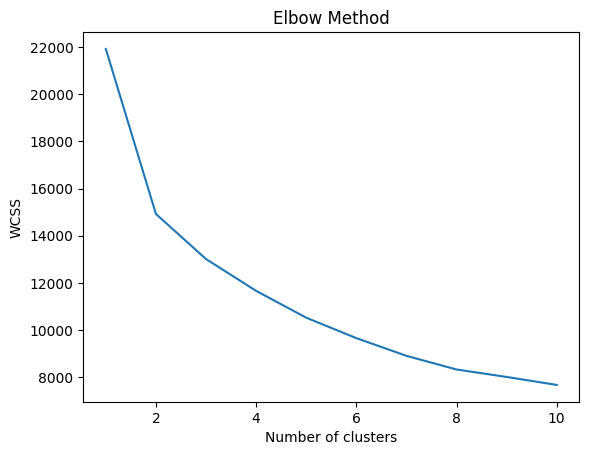

In [17]:
#elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(player_stats_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [23]:
#fitting the kmeans algorithm to the player stats dataset
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(player_stats_scaled)
player_stats['Cluster'] = cluster
player_stats.head(50)

c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,Rk_x,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional_y,Cluster
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,achiupr01,3
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,adamsst01,3
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,adebaba01,1
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,agbajoc01,4
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,aldamsa01,4
6,6,Nickeil Alexander-Walker,SG,24,UTA,36,3,14.7,2.3,4.7,...,0.3,0.5,0.8,0.074,-0.6,1.1,0.5,0.3,alexani01,4
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,0.0,0.3,0.3,0.044,-2.5,-0.5,-3.0,-0.1,alexani01,0
8,7,Grayson Allen,SG,27,MIL,72,70,27.4,3.4,7.7,...,2.8,2.2,5.1,0.123,-0.6,0.7,0.1,1.0,allengr01,4
9,8,Jarrett Allen,C,24,CLE,68,68,32.6,5.9,9.2,...,5.5,4.0,9.5,0.205,1.3,1.0,2.4,2.4,allenja01,3
10,9,Jose Alvarado,PG,24,NOP,61,10,21.5,3.3,8.0,...,0.1,1.7,1.8,0.066,-2.0,0.7,-1.2,0.3,alvarjo01,4


In [24]:
#print the number of players in each cluster
player_stats['Cluster'].value_counts()

0    182
4    164
5     89
2     81
3     61
1     31
6      1
Name: Cluster, dtype: int64

In [29]:
#show the 5th cluster
player_stats[player_stats['Cluster'] == 0].head(50)

,Rk_x,Player,Pos_x,Age_x,Tm,G_x,GS,MP_x,FG,FGA,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player-additional_y,Cluster
7,6,Nickeil Alexander-Walker,SG,24,MIN,23,0,15.5,2.1,5.4,...,0.0,0.3,0.3,0.044,-2.5,-0.5,-3.0,-0.1,alexani01,0
13,12,Thanasis Antetokounmpo,PF,30,MIL,37,0,5.6,0.5,1.2,...,-0.1,0.2,0.1,0.022,-6.5,-1.1,-7.6,-0.3,antetth01,0
17,15,Ryan Arcidiacono,PG,28,NYK,11,0,2.4,0.1,0.5,...,0.0,0.0,0.0,-0.012,-8.9,3.8,-5.1,0.0,arcidry01,0
18,15,Ryan Arcidiacono,PG,28,POR,9,4,16.2,0.9,3.6,...,-0.2,0.0,-0.1,-0.049,-7.0,-2.4,-9.4,-0.3,arcidry01,0
23,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,-0.1,0.3,0.1,0.029,-0.7,-1.4,-2.1,0.0,baldwpa01,0
30,25,Dalano Banton,PG,23,TOR,31,2,9.0,1.8,4.2,...,0.0,0.4,0.4,0.064,-1.1,0.6,-0.5,0.1,bantoda01,0
37,30,Will Barton,SG,32,TOR,16,2,13.2,1.8,4.9,...,0.0,0.2,0.2,0.051,-2.9,0.5,-2.5,0.0,bartowi01,0
48,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,-0.4,0.8,0.4,0.027,-4.1,-0.6,-4.8,-0.5,beaucma01,0
49,38,Dāvis Bertāns,PF,30,DAL,45,1,10.9,1.5,3.6,...,0.6,0.3,0.9,0.090,0.0,-1.3,-1.2,0.1,bertada01,0
56,41,Khem Birch,C,30,TOR,20,0,8.1,1.0,1.6,...,0.1,0.2,0.2,0.072,-4.6,1.1,-3.5,-0.1,birchkh01,0


In [30]:
# merge cluster 0 and 6
player_stats['Cluster'] = player_stats['Cluster'].replace(6, 0)

In [31]:
#show cluster averages
player_stats.groupby('Cluster').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_760\1030336261.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  player_stats.groupby('Cluster').mean()


,Rk_x,Age_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Cluster,,,,,,,,,,,,,,,,,,,,,
0,275.191257,25.464481,23.950820,1.448087,10.597814,1.287978,3.225683,0.399733,0.524590,1.638251,...,13.733516,16.608743,-0.016940,0.235519,0.222404,0.019077,-4.108197,-0.469399,-4.577049,-0.126776
1,233.612903,27.645161,63.741935,63.516129,34.790323,9.209677,18.148387,0.510323,1.916129,5.303226,...,11.748387,29.977419,5.754839,2.632258,8.390323,0.182806,4.990323,0.596774,5.577419,4.148387
2,255.283951,26.135802,56.333333,48.592593,32.076543,6.537037,14.193827,0.461815,2.155556,5.762963,...,11.706173,23.765432,1.807407,1.581481,3.387654,0.096062,1.102469,-0.560494,0.537037,1.035802
3,269.950820,25.557377,63.606557,42.311475,25.388525,4.414754,7.834426,0.575885,0.524590,1.513115,...,13.190164,17.231148,2.649180,2.096721,4.737705,0.141525,0.090164,0.606557,0.686885,1.111475
4,282.603659,26.042683,52.658537,20.396341,22.813415,3.206707,7.221341,0.444317,1.315244,3.604878,...,11.873171,16.982317,0.810366,1.115854,1.929268,0.076482,-1.350000,-0.056707,-1.400610,0.201829
5,246.853933,25.898876,27.595506,2.292135,11.255056,1.732584,3.233708,0.546978,0.295506,0.862921,...,12.619101,16.462921,0.430337,0.442697,0.870787,0.128303,-1.274157,0.442697,-0.832584,0.075281


In [32]:
#reorder clusters
player_stats['Cluster'] = player_stats['Cluster'].map({0: 6, 1: 1, 2: 3, 3: 2, 4: 4, 5: 5})

#show the average stats for each cluster
player_stats.groupby('Cluster').mean()

C:\Users\krist\AppData\Local\Temp\ipykernel_760\730066818.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  player_stats.groupby('Cluster').mean()


,Rk_x,Age_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Cluster,,,,,,,,,,,,,,,,,,,,,
1,233.612903,27.645161,63.741935,63.516129,34.790323,9.209677,18.148387,0.510323,1.916129,5.303226,...,11.748387,29.977419,5.754839,2.632258,8.390323,0.182806,4.990323,0.596774,5.577419,4.148387
2,269.950820,25.557377,63.606557,42.311475,25.388525,4.414754,7.834426,0.575885,0.524590,1.513115,...,13.190164,17.231148,2.649180,2.096721,4.737705,0.141525,0.090164,0.606557,0.686885,1.111475
3,255.283951,26.135802,56.333333,48.592593,32.076543,6.537037,14.193827,0.461815,2.155556,5.762963,...,11.706173,23.765432,1.807407,1.581481,3.387654,0.096062,1.102469,-0.560494,0.537037,1.035802
4,282.603659,26.042683,52.658537,20.396341,22.813415,3.206707,7.221341,0.444317,1.315244,3.604878,...,11.873171,16.982317,0.810366,1.115854,1.929268,0.076482,-1.350000,-0.056707,-1.400610,0.201829
5,246.853933,25.898876,27.595506,2.292135,11.255056,1.732584,3.233708,0.546978,0.295506,0.862921,...,12.619101,16.462921,0.430337,0.442697,0.870787,0.128303,-1.274157,0.442697,-0.832584,0.075281
6,275.191257,25.464481,23.950820,1.448087,10.597814,1.287978,3.225683,0.399733,0.524590,1.638251,...,13.733516,16.608743,-0.016940,0.235519,0.222404,0.019077,-4.108197,-0.469399,-4.577049,-0.126776


In [43]:
#calculate how many players of each cluster are in each team
team_clusters = player_stats.groupby(['Tm', 'Cluster']).size().unstack(fill_value=0)
team_clusters

Cluster,1,2,3,4,5,6
Tm,,,,,,
ATL,1,3,2,3,3,8
BOS,2,2,3,2,4,5
BRK,1,2,5,8,1,8
CHI,2,2,0,5,5,4
CHO,0,3,5,4,1,6
CLE,1,2,1,6,2,6
DAL,1,2,2,6,2,10
DEN,1,1,2,4,5,5
DET,0,4,4,6,1,7


In [44]:
#join the team clusters with the team stats dataset but rename the columns first
team_clusters.columns = ['Cluster_' + str(col) for col in team_clusters.columns]
team_clusters = team_clusters.reset_index()
team_clusters.head()



,Tm,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,ATL,1,3,2,3,3,8
1,BOS,2,2,3,2,4,5
2,BRK,1,2,5,8,1,8
3,CHI,2,2,0,5,5,4
4,CHO,0,3,5,4,1,6


In [45]:
team_stats = pd.merge(team_stats, team_clusters, left_on='Team', right_on='Tm')
team_stats = team_stats.drop('Tm', axis=1)
team_stats.head()

,Rk_x,Team,Age,W_x,L_x,PW,PL,MOV_x,SOS,SRS,...,Acquired via Waiver Claim,Acquired via Expansion,Acquired via Free Agency,Total Roster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,1.0,BOS,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,...,0,0,5,15,2,2,3,2,4,5
1,2.0,CLE,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,...,0,0,7,15,1,2,1,6,2,6
2,3.0,PHI,28.2,54.0,28.0,52,30,4.32,0.06,4.37,...,0,0,7,15,2,0,3,6,3,7
3,4.0,MEM,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,...,0,0,3,15,1,4,2,6,1,5
4,5.0,MIL,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,...,0,0,9,15,1,2,2,5,2,9


In [46]:
#make team column the index
team_stats = team_stats.set_index('Team')
team_stats.head()

,Rk_x,Age,W_x,L_x,PW,PL,MOV_x,SOS,SRS,ORtg_x,...,Acquired via Waiver Claim,Acquired via Expansion,Acquired via Free Agency,Total Roster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
Team,,,,,,,,,,,,,,,,,,,,,
BOS,1.0,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,118.0,...,0,0,5,15,2,2,3,2,4,5
CLE,2.0,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,116.1,...,0,0,7,15,1,2,1,6,2,6
PHI,3.0,28.2,54.0,28.0,52,30,4.32,0.06,4.37,117.7,...,0,0,7,15,2,0,3,6,3,7
MEM,4.0,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,115.1,...,0,0,3,15,1,4,2,6,1,5
MIL,5.0,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,115.4,...,0,0,9,15,1,2,2,5,2,9


In [58]:
#create clusters for the team stats dataset based on the team's stats to predict the team's strategy
#select the columns that will be used to create the clusters
team_stats_c2 = team_stats.copy()
#drop stadium name
team_stats_c2 = team_stats_c2.drop('Arena', axis=1)
#replace east and west with 1 and 0
team_stats_c2['Conference'] = team_stats_c2['Conf'].map({'E': 1, 'W': 0})
#drop division
team_stats_c2 = team_stats_c2.drop('Div', axis=1)
#drop conference
team_stats_c2 = team_stats_c2.drop('Conf', axis=1)

c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

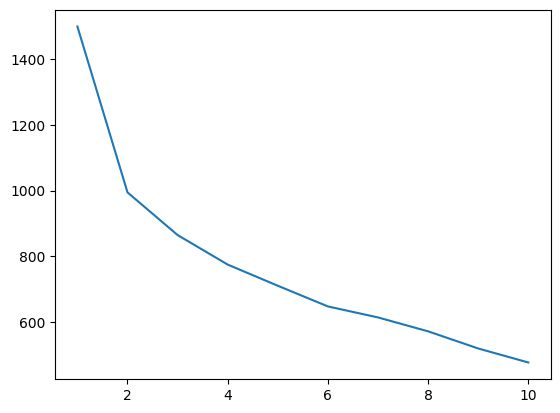

In [59]:
#standardize the data
scaler = StandardScaler()
team_stats_scaled = scaler.fit_transform(team_stats_c2)

#elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(team_stats_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)

In [61]:
#fitting the kmeans algorithm to the team stats dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(team_stats_scaled)
team_stats['Cluster'] = cluster
team_stats.head(34)

c:\Users\krist\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Rk_x,Age,W_x,L_x,PW,PL,MOV_x,SOS,SRS,ORtg_x,...,Acquired via Expansion,Acquired via Free Agency,Total Roster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster
Team,,,,,,,,,,,,,,,,,,,,,
BOS,1.0,27.4,57.0,25.0,57,25,6.52,-0.15,6.38,118.0,...,0,5,15,2,2,3,2,4,5,0
CLE,2.0,25.4,51.0,31.0,55,27,5.38,-0.15,5.23,116.1,...,0,7,15,1,2,1,6,2,6,0
PHI,3.0,28.2,54.0,28.0,52,30,4.32,0.06,4.37,117.7,...,0,7,15,2,0,3,6,3,7,0
MEM,4.0,24.4,51.0,31.0,51,31,3.94,-0.34,3.60,115.1,...,0,3,15,1,4,2,6,1,5,0
MIL,5.0,29.8,58.0,24.0,50,32,3.63,-0.02,3.61,115.4,...,0,9,15,1,2,2,5,2,9,0
DEN,6.0,26.6,53.0,29.0,49,33,3.33,-0.29,3.04,117.6,...,0,4,15,1,1,2,4,5,5,0
NYK,7.0,24.5,47.0,35.0,48,34,2.93,0.06,2.99,117.8,...,0,6,15,2,3,2,3,1,6,0
SAC,8.0,25.4,48.0,34.0,47,35,2.65,-0.35,2.30,119.4,...,0,7,15,2,0,3,4,4,7,0
PHO,9.0,28.1,45.0,37.0,46,36,2.07,0.01,2.08,115.1,...,0,6,15,1,2,3,8,5,1,0


In [64]:
player_stats.to_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\player_clusters.csv")

In [62]:
#save the final dataset as a csv file
team_stats.to_csv(r"C:\Users\krist\Documents\BME\2024_2025_1\Diplomatervezes_2\data\ML_outputs\team_clusters.csv")